In [5]:
import sys
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from Data_Generation_Functions import *

Computing g2: 100%|██████████| 201/201 [00:00<00:00, 2968503.89config/s]


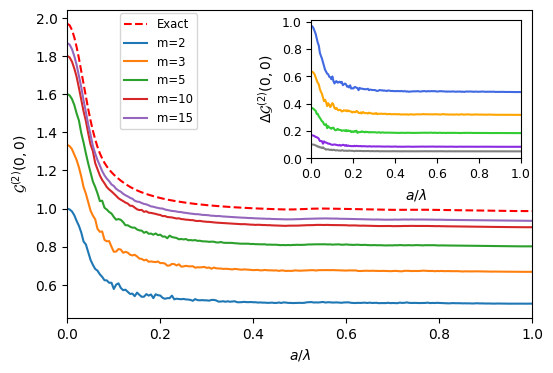

In [18]:
#Plot Convergance of MWise Approximation with Sample Size
N = 8
Dim = 2
m_set = [2, 3, 5, 10, 15]
Num_Samples = 10000
a_set = np.linspace(0, 1, 201)

fig, ax = plt.subplots(figsize=(6, 4))

#Plot Exact Solution
Samples_Exact = Sampling_Methods(SOCF_Type.G2, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", color="red", linestyle='dashed')

ax_inset = inset_axes(ax, width="45%", height="45%", loc="upper right", bbox_to_anchor=(-0.01, -0.01, 1, 1), bbox_transform=ax.transAxes)

#Plot M-Wise Approximations
color_set = ["royalblue", 'orange', 'limegreen', 'blueviolet', 'grey']
for m in m_set:
    Samples_MWise = Sampling_Methods(SOCF_Type.G2, Approx.MWISE, N, Dim, m, Num_Samples=Num_Samples)
    Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)

    MWise_a, MWise_g2 = map(list, zip(*Data))
    MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) # Sort both lists based on MWise_a values
    ax.plot(MWise_a, MWise_g2, label=f"m={m}")

    ax_inset.plot(MWise_a, np.abs(np.array(MWise_g2) - np.array(Exact_g2)), c=color_set[m_set.index(m)])

ax.set_xlabel('$a/\lambda$')
ax.set_ylabel('$\mathcal{G}^{(2)}(0,0)$')
ax.set_xlim([0, 1])
ax.legend(bbox_to_anchor=(0.1, 0.8), loc='center left', fontsize='small')

ax_inset.set_xlabel('$a/\lambda$')
ax_inset.set_ylabel('$\Delta \mathcal{G}^{(2)}(0,0)$')
ax_inset.set_xlim([0, 1])
ax_inset.tick_params(labelsize=9) 
ax_inset.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.show()
